In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import cv2


In [17]:
def threshold(img):
    return np.where(img[:,:,2]>100,255,0)

In [4]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern =  np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return kern/kern.sum()

In [3]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    # compute the derivatives
    Ix = convolve2d(image, np.array([[-1, 0, 1]]), mode='same')
    Iy = convolve2d(image, np.array([[-1, 0, 1]]).T, mode='same')
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy
    # compute the gaussian kernel
    kern = gaussianKernel(scale)
    # compute the sum of the squares of the derivatives
    Sxx = convolve2d(Ixx, kern, mode='same')
    Syy = convolve2d(Iyy, kern, mode='same')
    Sxy = convolve2d(Ixy, kern, mode='same')
    # compute the R matrix
    R = (Sxx*Syy - Sxy**2) - kappa*(Sxx+Syy)**2
    return R

In [5]:
def rnms(image_harris,Rbin):
    """ Array[n, m] -> Array[n, m] 
    """
    # compute the size of the image
    n,m = image_harris.shape
    # create a new image
    image_rnms = np.zeros((n,m))
    # for each pixel
    for i in range(1,n-1):
        for j in range(1,m-1):
            # if the pixel is a local maximum,check if the pixel is the local maximum of its 8-neighborhood
            if Rbin[i,j] == 1 and np.max(image_harris[i-1:i+2, j-1:j+2]) == image_harris[i,j]:
                image_rnms[i,j] = 1
    return image_rnms

def cornerDetector(image, sigma, kappa, thres):
    """ Array[n, m]*float*float*float -> Array[n, m]
    """
    R = computeR(image, sigma, kappa)
    max,min=R.max(),R.min()
    Rnorm=(R-min)/(max-min)
    Rbin = thresholdR(Rnorm, thres)
    image_rnms = rnms(Rnorm, Rbin)
    return image_rnms

def thresholdR(R, thres):
    """ Array[n, m] * float -> Array[n, m]
    """
    return(np.where(R>thres, 1, 0))

In [26]:
def find_points(I1,I2,num,sigma=5,kappa=0.04,thres=0.3):
    test=threshold(I1)
    test1=threshold(I2)
    sub=test1-test
    pos=np.where(sub>0,0,255)
    neg=np.where(sub<0,0,255)
    image_rnms = cornerDetector(sub, sigma, kappa, thres)
    n2=int(np.ceil(3*sigma))
    x,y=np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    corners=np.argwhere(image_rnms==1)
    
    #plt.imshow(test,cmap='gray')
    #plt.scatter(corners[:,1],corners[:,0],s=2*n2-1,marker='o',edgecolors='r',facecolors='none')
    #plt.savefig('result/nid/{:>03d}.jpg'.format(num))
    return(corners)
   


In [14]:
data_matrix = np.load('extract/nid/extact_matrix.npy', allow_pickle=True)

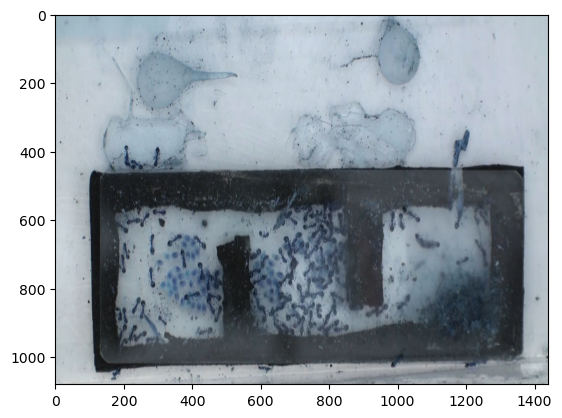

In [16]:
plt.imshow(threshold(data_matrix[0]))

In [27]:
points_matrix=[]
for i in range(100):
    print('第',i, '張圖')
    corners=find_points(data_matrix[i],data_matrix[i+1],i)
    points_matrix.append(corners)
points_matrix=np.array(points_matrix)
np.save('result/nid/100.npy',points_matrix)

第 0 張圖
第 1 張圖
第 2 張圖
第 3 張圖
第 4 張圖
第 5 張圖
第 6 張圖
第 7 張圖
第 8 張圖
第 9 張圖
第 10 張圖
第 11 張圖
第 12 張圖
第 13 張圖
第 14 張圖
第 15 張圖
第 16 張圖
第 17 張圖
第 18 張圖
第 19 張圖
第 20 張圖
第 21 張圖
第 22 張圖
第 23 張圖
第 24 張圖
第 25 張圖
第 26 張圖
第 27 張圖
第 28 張圖
第 29 張圖
第 30 張圖
第 31 張圖
第 32 張圖
第 33 張圖
第 34 張圖
第 35 張圖
第 36 張圖
第 37 張圖
第 38 張圖
第 39 張圖
第 40 張圖
第 41 張圖
第 42 張圖
第 43 張圖


In [ ]:
points_matrix=[]
for k in range(1,7):
    print('第',k, '组图')
    for i in range(100*k,100*(k+1)):
        corners=find_points(data_matrix[i],data_matrix[i+1],i)
        points_matrix.append(corners)
    points_matrix=np.array(points_matrix)
    np.save('result/nid/{}00.npy'.format(str(k+1)),points_matrix)

In [ ]:
points_matrix=[]
for k in range(7,15):
    print('第',k, '组图')
    for i in range(100*k,100*(k+1)):
        corners=find_points(data_matrix[i],data_matrix[i+1],i)
        points_matrix.append(corners)
    points_matrix=np.array(points_matrix)
    np.save('result/nid/{}00.npy'.format(str(k+1)),points_matrix)